In [54]:
# import pandas as pd

# Replace 'input.tsv' with your actual file path
# df = pd.read_csv("amazon_alexa.tsv", sep='\t')  # Read TSV with tab delimiter
# df.to_csv("output.csv", index=False)  # Save as CSV without index column


In [3]:
import pandas as pd

df = pd.read_csv('output.csv')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.isna().sum() # check for missing or nan --> not a num

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.describe()   # describe its statistics 

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df.feedback.unique()   # returns array like object contain unique feedback 

array([1, 0], dtype=int64)

In [9]:
import matplotlib.pyplot as plt  # helps for visualization in graphs form
import seaborn as sns    # data visualization library based on Matplotlib---high-level interface for drawing attractive and informative statistical graphics

In [10]:
df.rating.value_counts()   # shows count of each rating

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

### We countplot the rating column to visualize the number of ratings for each start eg: 1 star, 2 star etc


<Axes: xlabel='rating', ylabel='count'>

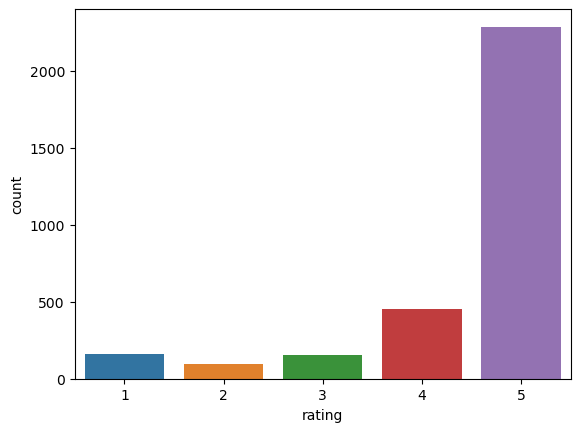

In [11]:
sns.countplot(x='rating',data=df)  # df is a 1D array

#### We are finding the percentage values of the ratings

In [12]:
round(df['rating'].value_counts()/df.shape[0]*100,2)  #alculates the percentage distribution of each unique value in the 'rating' column rounds the result to two decimal places.
# shape[0] ---> the number of rows

5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64

In [13]:
df.groupby('feedback').describe()

rating                                             
           count      mean       std  min  25%  50%  75%  max
feedback                                                     
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

In [14]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

* The above shows the number of people who did give a feedback and number of people who didn't

In [15]:
review_0 = df[df['feedback'] == 0].iloc[1]['verified_reviews']
print('Feedback 0:\n')
print(review_0)
print("\n")

print('Feedback 1:\n')
review_1 = df[df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Feedback 0:

Sound is terrible if u want good music too get a bose


Feedback 1:

Loved it!


* This clearly shows that a feedback of 0 indicates a negative feedback and a feedback of 1 indicates a positive feedback

#### We can plot a bar graph to visualize how many positive and negative feedbacks are given by a user

Text(0, 0.5, 'Count')

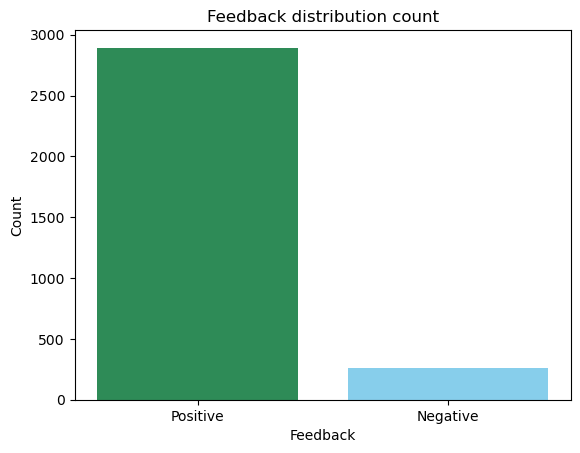

In [16]:
feedback_data = df['feedback'].tolist() # This converts the 'feedback' column of the DataFrame df into a list

positive_feedback = feedback_data.count(1) # counts the occurrences of positive feedback
negative_feedback = feedback_data.count(0)

labels = ['Positive','Negative']
heights = [positive_feedback, negative_feedback] #  heights of the bars

plt.bar(labels,heights,color=['seagreen','skyblue'])
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')

#### Now we will see the 'rating' values for different values of 'feedback'

In [17]:
df[df['feedback']==0]['rating'].value_counts()  # negative feedbacks --> rating count

1    161
2     96
Name: rating, dtype: int64

In [18]:
df[df['feedback']==1]['rating'].value_counts() # posituve feedbacks ---> rating count

5    2286
4     455
3     152
Name: rating, dtype: int64

* So clearly my 1 star and 2 star rating indicates it to be a negative feedback while 3 star, 4 star and 5 star ratings mean a positive feedback

### Now we check the variations column which means these are the different types or variations of alexa


In [19]:
df.groupby('variation').describe()

rating                                          \
                              count      mean       std  min  25%  50%  75%   
variation                                                                     
Black                         261.0  4.233716  1.339838  1.0  4.0  5.0  5.0   
Black  Dot                    516.0  4.453488  1.027660  1.0  4.0  5.0  5.0   
Black  Plus                   270.0  4.370370  1.158391  1.0  4.0  5.0  5.0   
Black  Show                   265.0  4.490566  0.996635  1.0  4.0  5.0  5.0   
Black  Spot                   241.0  4.311203  1.247764  1.0  4.0  5.0  5.0   
Charcoal Fabric               430.0  4.730233  0.683994  1.0  5.0  5.0  5.0   
Configuration: Fire TV Stick  350.0  4.591429  0.990751  1.0  5.0  5.0  5.0   
Heather Gray Fabric           157.0  4.694268  0.647108  2.0  5.0  5.0  5.0   
Oak Finish                     14.0  4.857143  0.363137  4.0  5.0  5.0  5.0   
Sandstone Fabric               90.0  4.355556  0.997875  1.0  4.0  5.0  5.0   
Walnut Finish                   9.0  4.888889  0.333333  4.0  5.0  5.0  5.0   
White                          91.0  4.142857  1.464934  1.0  4.0  5.0  5.0   
White  Dot                    184.0  4.423913  1.047857  1.0  4.0  5.0  5.0   
White  Plus                    78.0  4.358974  1.184032  1.0  4.0  5.0  5.0   
White  Show                    85.0  4.282353  1.278129  1.0  4.0  5.0  5.0   
White  Spot                   109.0  4.311927  1.222454  1.0  4.0  5.0  5.0   

                                  feedback                                     \
                              max    count      mean       std  min  25%  50%   
variation                                                                       
Black                         5.0    261.0  0.865900  0.341414  0.0  1.0  1.0   
Black  Dot                    5.0    516.0  0.930233  0.255002  0.0  1.0  1.0   
Black  Plus                   5.0    270.0  0.896296  0.305442  0.0  1.0  1.0   
Black  Show                   5.0    265.0  0.932075  0.252092  0.0  1.0  1.0   
Black  Spot                   5.0    241.0  0.867220  0.340043  0.0  1.0  1.0   
Charcoal Fabric               5.0    430.0  0.972093  0.164898  0.0  1.0  1.0   
Configuration: Fire TV Stick  5.0    350.0  0.920000  0.271682  0.0  1.0  1.0   
Heather Gray Fabric           5.0    157.0  0.987261  0.112504  0.0  1.0  1.0   
Oak Finish                    5.0     14.0  1.000000  0.000000  1.0  1.0  1.0   
Sandstone Fabric              5.0     90.0  0.933333  0.250841  0.0  1.0  1.0   
Walnut Finish                 5.0      9.0  1.000000  0.000000  1.0  1.0  1.0   
White                         5.0     91.0  0.813187  0.391921  0.0  1.0  1.0   
White  Dot                    5.0    184.0  0.934783  0.247583  0.0  1.0  1.0   
White  Plus                   5.0     78.0  0.897436  0.305352  0.0  1.0  1.0   
White  Show                   5.0     85.0  0.870588  0.337647  0.0  1.0  1.0   
White  Spot                   5.0    109.0  0.889908  0.314450  0.0  1.0  1.0   

                                        
                              75%  max  
variation                               
Black                         1.0  1.0  
Black  Dot                    1.0  1.0  
Black  Plus                   1.0  1.0  
Black  Show                   1.0  1.0  
Black  Spot                   1.0  1.0  
Charcoal Fabric               1.0  1.0  
Configuration: Fire TV Stick  1.0  1.0  
Heather Gray Fabric           1.0  1.0  
Oak Finish                    1.0  1.0  
Sandstone Fabric              1.0  1.0  
Walnut Finish                 1.0  1.0  
White                         1.0  1.0  
White  Dot                    1.0  1.0  
White  Plus                   1.0  1.0  
White  Show                   1.0  1.0  
White  Spot                   1.0  1.0

In [20]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

* The above shows that the most popular variation of alexa is the Black Dot

#### Mean rating according to variation

In [21]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

#### Now let's analyze the above ratings

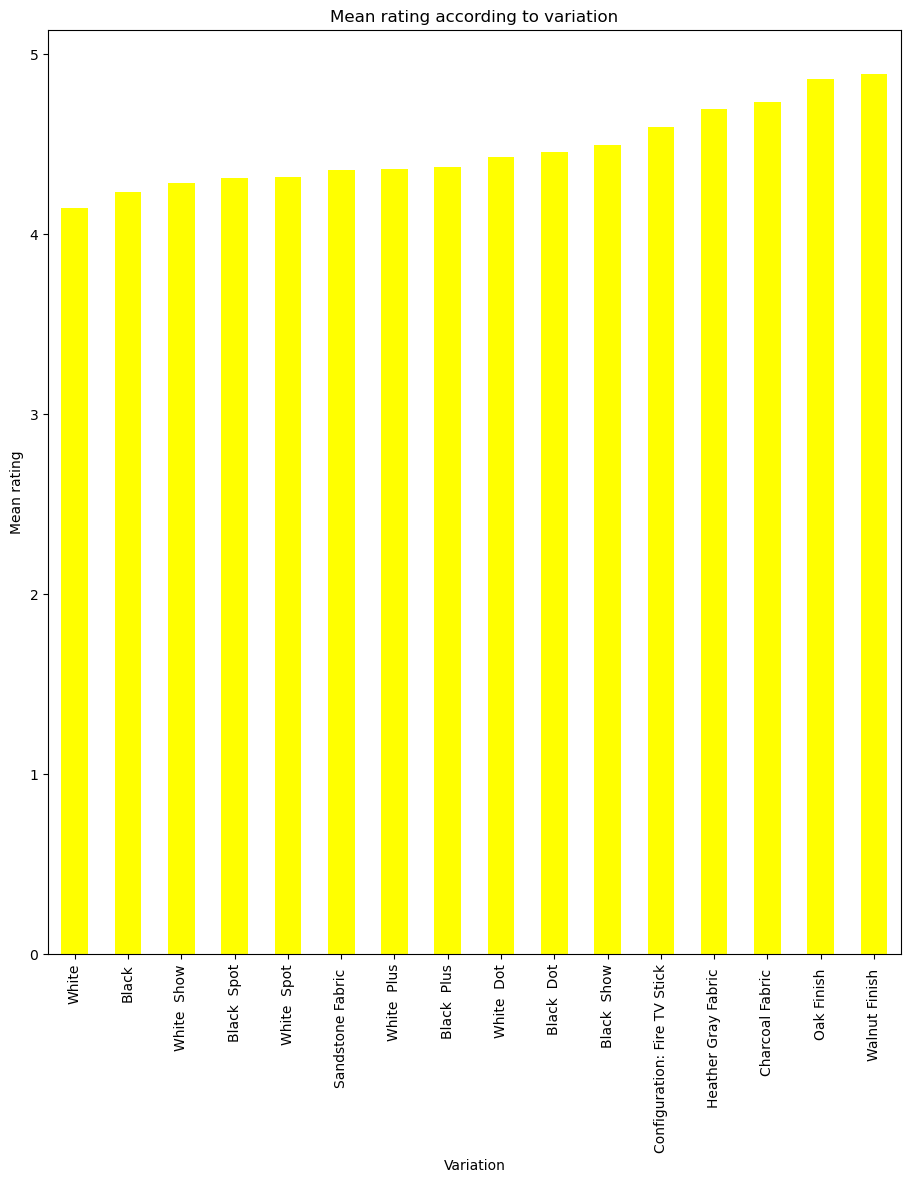

In [58]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color='yellow', figsize=(11,6))
plt.title('Mean rating according to variation')
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

#### A new column length was created to know the length of the reviews

In [23]:
df['verified_reviews'].dtype # o/p --> means some values are present 

dtype('O')

In [24]:
df['verified_reviews'] = df['verified_reviews'].astype(str) # converts diff datatypes to string

In [25]:
df['length'] = df['verified_reviews'].apply(len)

In [26]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


#### length analysis of feedback 

Text(0, 0.5, 'Count')

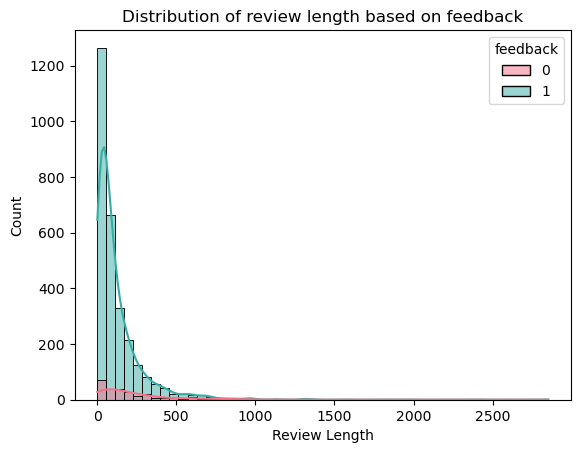

In [60]:
sns.histplot(data=df, x='length', hue='feedback', bins=50, kde=True, palette='husl')
plt.title('Distribution of review length based on feedback')
plt.xlabel('Review Length')
plt.ylabel('Count')

# bins --> intervals
# kde --> ka=ernal density curve


#### Length of reviews analysis of feedback 0

[Text(0.5, 1.0, 'Distribution of length of review if feedback=0')]

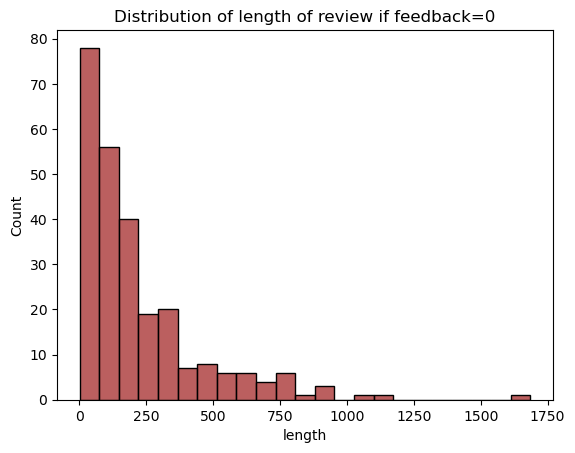

In [28]:
sns.histplot(df[df['feedback']==0]['length'],color='brown').set(title='Distribution of length of review if feedback=0')

#### Length of reviews analysis of feedback 1

[Text(0.5, 1.0, 'Distribution of length of review if feedback=1')]

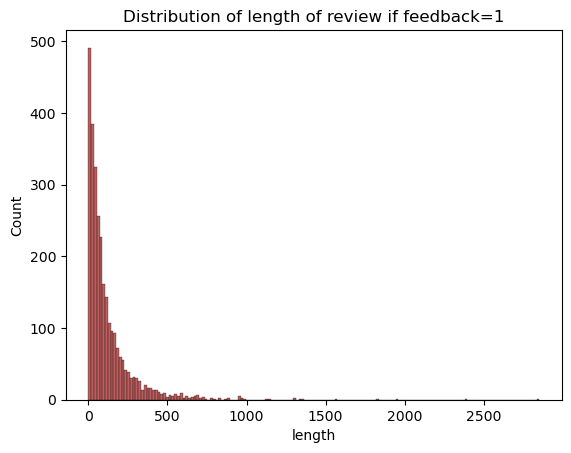

In [29]:
sns.histplot(df[df['feedback']==1]['length'],color='brown').set(title='Distribution of length of review if feedback=1')

#### Length wise mean rating

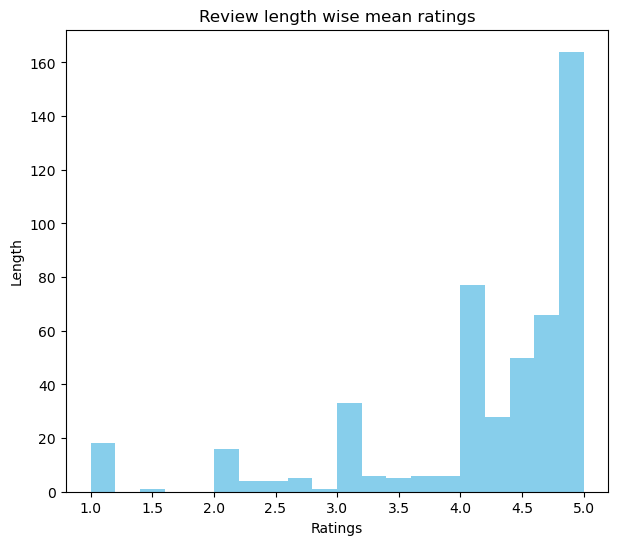

In [64]:
df.groupby('length')['rating'].mean().plot.hist(color='skyblue',figsize=(7,6),bins = 20)
plt.title('Review length wise mean ratings')
plt.xlabel('Ratings')
plt.ylabel('Length')
plt.show()

* We can see that the length of reviews is high for positive feedback

#### Now we are using count vectorizer to convert the textual data into vector representations
* It is used for converting a collection of text documents into a matrix of token counts


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') #  common English stop words (e.g., 'the', 'is', 'and') should be removed during the tokenization process.
words = cv.fit_transform(df.verified_reviews)

*  In this line, we initialize the CountVectorizer object cv with some parameters. stop_words='english' is one of the parameters passed during initialization. It specifies that common English words such as 'the', 'and', 'is', etc., should be ignored because they usually don't carry much meaningful information for certain natural language processing tasks.

* It transforms the text data into a matrix of token counts.
* The values in the matrix represent the count of each word( cols) in each document(rows).

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [65]:
# from wordcloud import WordCloud

# # combining all the reviews
# reviews = " ".join([review for review in df['verified_reviews']])

# # initialize wordcloud object
# wc = WordCloud(background_color='white',max_words=50,font_path=r"C:\Users\KIIT\Desktop\AIGDT___.ttf")

# # generate and plot wordcloud
# plt.figure(figsize=(10,10))
# plt.imshow(wc.generate(reviews))
# plt.title('Wordcloud for all reviews',fontsize=10)
# plt.axis('off')
# plt.show()

* Textblob module: linguistic researcg have labeled the sentiment of words based on their domain expertise
* Sentiment of words can vary based on where it is in a sentence. This module allows us to take advantage of these modules.
* Sentiment labels: each word in a cprous is labeled in terms of polarity and subjectivity
   * Polarity: how positive or negative a word is -1 is very negative, +1 is very positive
   * Subjectivity: how subjective, or opinionized a word is: 0 is fact, +1 is opinion

In [31]:
pip install textblob 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# NLTK (Natural Language Toolkit) 
# extBlob is a Python library for natural language processing (NLP) tasks such as
# part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [33]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity # calc how much is polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['verified_reviews'].apply(pol)
df['subjectivity'] = df['verified_reviews'].apply(sub)
df

,rating,date,variation,verified_reviews,feedback,length,polarity,subjectivity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.625000,0.600000
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.875000,0.800000
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,-0.100000,0.512500
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.350000,0.450000
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.000000,0.000000
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50,1.000000,1.000000
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135,0.333333,0.452381
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441,0.237662,0.533766
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380,0.316667,0.632099


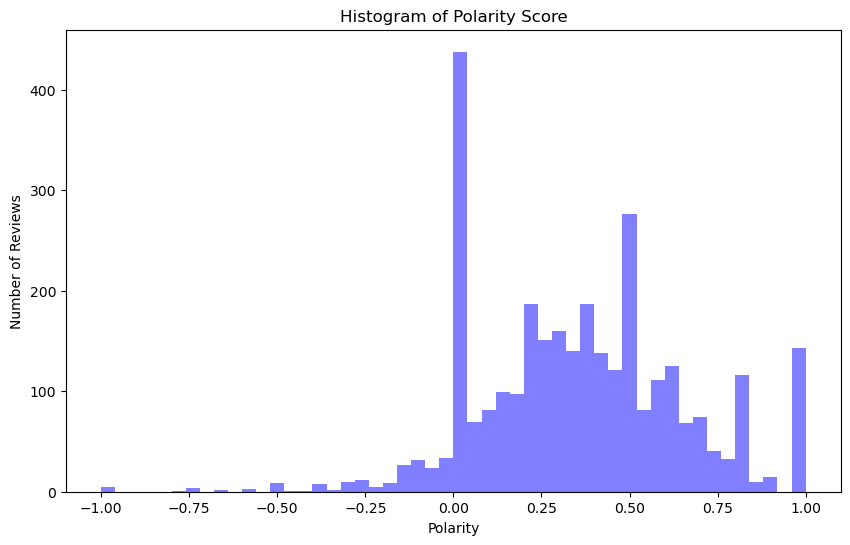

In [69]:
num_bins = 50
plt.figure(figsize=(10,6))
n,bins,patches = plt.hist(df.polarity, num_bins, facecolor = 'blue', alpha=0.5)# alpha  --> transparency
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.title('Histogram of Polarity Score')
plt.show()

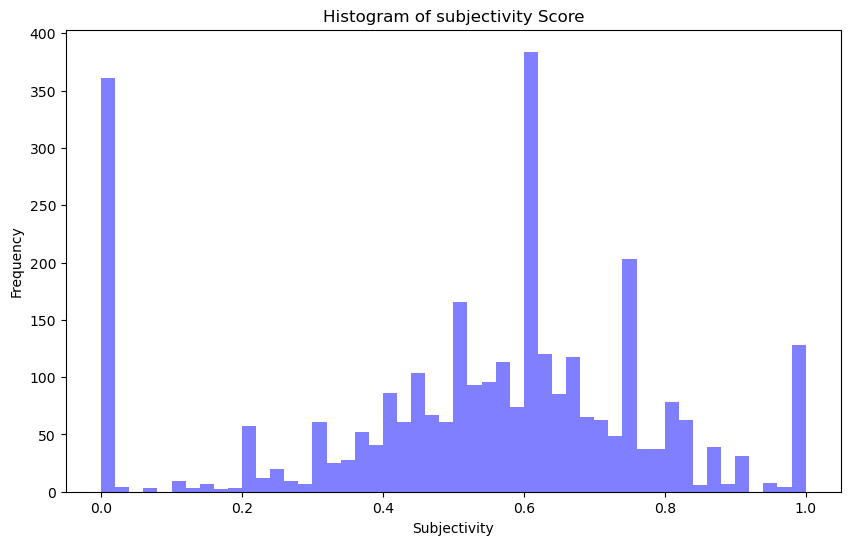

In [34]:
num_bins = 50
plt.figure(figsize=(10,6))
n,bins,patches = plt.hist(df.subjectivity, num_bins, facecolor = 'blue', alpha=0.5)
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.title('Histogram of subjectivity Score')
plt.show()

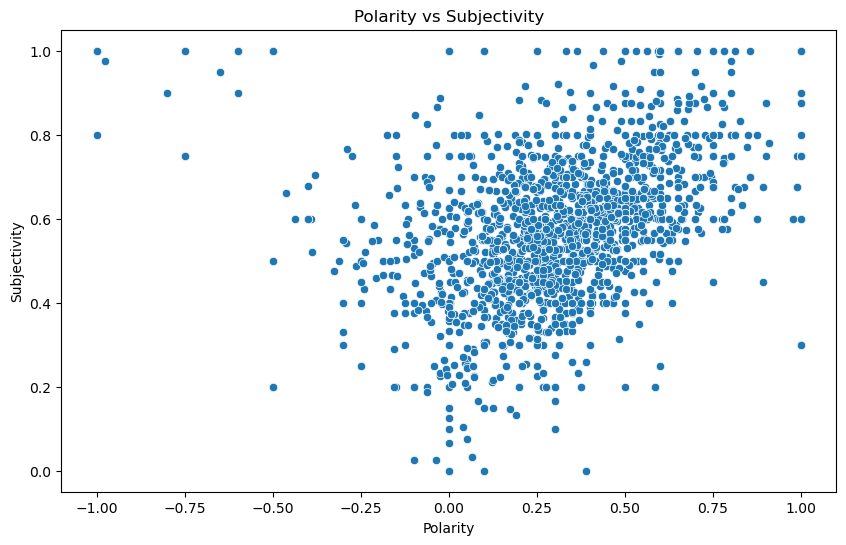

In [35]:
# Polarity vs Subjectivity scatterplot

plt.figure(figsize=(10,6))
sns.scatterplot(x='polarity',y = 'subjectivity', data=df)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Polarity vs Subjectivity')
plt.show()

### Preprocessing and Modelling
To build the corpus from the 'verified_reviews' we perform the following-
* Replace any non alphabet characters with a space
* Convert to lower case and split into words
* Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [36]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]',' ', df.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

NameError: name 'PorterStemmer' is not defined

* Porterstemmer algorithm is used to remove suffixes from english words and obtain their stems
* It is commonly used in the field of information retrieval to reduce the number of terms used by an IR system which can be advantageous in terms of space and time complexity

Using Count Vectorizer to create bag of words
* Helps to convert textual data into numerical representations
* Models do not understand categorical data

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features= 2500)

# storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

NameError: name 'corpus' is not defined

In [39]:
#saving the countvectorizer
import pickle
pickle.dump(cv,open('Models/countVectorizer.pkl','wb'))

Checking the shape of X and y

In [40]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [41]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Splitting data into train and test set with 30% data with testing

In [42]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state= 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


### Normalization technique is applied to scale the values in the range of 0 to 1
* We are using min max scalar in this case

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [44]:
# Saving the scalar model
pickle.dump(scaler, open('Models/scalar.pkl','wb'))

#### Now we use Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

#### Now we check accuracy of the model

In [46]:
print('Training Accuracy :', model_rf.score(X_train_scl,y_train))
print('Testing Accuracy :', model_rf.score(X_test_scl,y_test))


Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9386243386243386


In [47]:
# predicting on the test set
y_preds = model_rf.predict(X_test_scl)

#### Now we build a confusion matrix

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_preds)

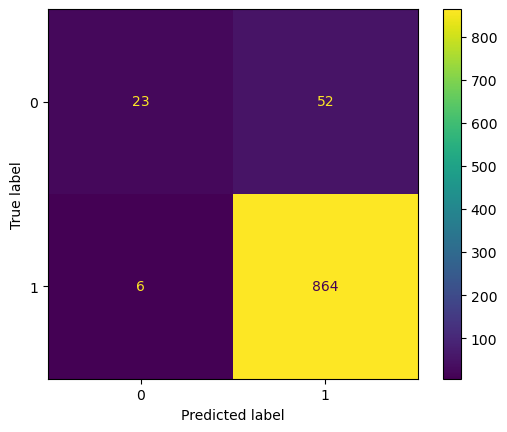

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

#### Now we may trying using XGBoost classifier to check the performance

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9407407407407408


In [53]:
pickle.dump(xgb_classifier, open('Models/xgb_classifier.pkl', 'wb'))

* Therefore we use XGBoost classifier since it gives a better accuracy in testing than the randomforest